## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display

## Load Data

In [2]:
df = pd.read_csv('../Data/combined_data_cleaned.csv')

In [3]:
df.head(2)

,category,description,title,also_buy,brand,rank,also_view,main_cat,price,asin,details,overall,verified,reviewerID,reviewText,summary,vote,style
0,"['Grocery & Gourmet Food', 'Beverages', 'Coffe...",['Lipton Yellow Label Tea use only the finest ...,Lipton Yellow Label Tea (loose tea) - 450g,"['B00886E4K0', 'B00CREXSHY', 'B001QTRGAQ', 'B0...",Lipton,"30,937 in Grocery & Gourmet Food (","['B00CREXSHY', 'B001QTRGAQ', 'B000JSQK70', 'B0...",Grocery,12.46,4639725043,NaN,5.0,True,A1J205ZK25TZ6W,I make the best brewed iced tea with this yell...,Best for brewed iced tea.,8.0,NaN
1,"['Grocery & Gourmet Food', 'Beverages', 'Coffe...",['Lipton Yellow Label Tea use only the finest ...,Lipton Yellow Label Tea (loose tea) - 450g,"['B00886E4K0', 'B00CREXSHY', 'B001QTRGAQ', 'B0...",Lipton,"30,937 in Grocery & Gourmet Food (","['B00CREXSHY', 'B001QTRGAQ', 'B000JSQK70', 'B0...",Grocery,12.46,4639725043,NaN,3.0,True,ACOICLIJQYECU,I have recently started drinking hot tea again...,Not Bad for iced Tea,9.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086548 entries, 0 to 1086547
Data columns (total 18 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   category     1086548 non-null  object 
 1   description  993137 non-null   object 
 2   title        1086548 non-null  object 
 3   also_buy     929733 non-null   object 
 4   brand        1078563 non-null  object 
 5   rank         1042485 non-null  object 
 6   also_view    578911 non-null   object 
 7   main_cat     1085268 non-null  object 
 8   price        752804 non-null   float64
 9   asin         1086548 non-null  object 
 10  details      1086497 non-null  object 
 11  overall      1086548 non-null  float64
 12  verified     1086548 non-null  bool   
 13  reviewerID   1086548 non-null  object 
 14  reviewText   1086175 non-null  object 
 15  summary      1086335 non-null  object 
 16  vote         149486 non-null   float64
 17  style        561516 non-null   object 
dtypes:

### Explore Data

#### Numeric Data
Overall rating, vote, and price.

In [5]:
df.describe()

,price,overall,vote
count,752804.000000,1.086548e+06,149486.000000
mean,20.848562,4.439878e+00,6.678405
std,17.727955,1.065040e+00,22.087053
min,0.010000,1.000000e+00,2.000000
25%,11.800000,4.000000e+00,2.000000
50%,16.980000,5.000000e+00,3.000000
75%,25.990000,5.000000e+00,6.000000
max,999.000000,5.000000e+00,2584.000000


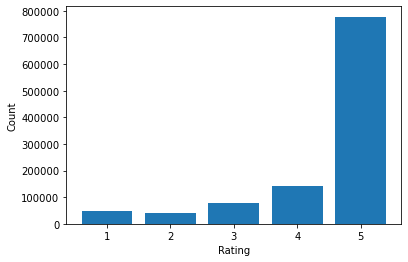

In [6]:
# overall rating
labels, counts = np.unique(df.overall, return_counts=True)
plt.bar(labels, counts, align='center')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

The data is heavily skewed towards 5-star reviews.

In [7]:
# Some of the prices appear to be pretty high for groceries; but apparently valid.
df[df['price'] > 950].sort_values('price', ascending=False).head(2)

,category,description,title,also_buy,brand,rank,also_view,main_cat,price,asin,details,overall,verified,reviewerID,reviewText,summary,vote,style
659028,"['Grocery & Gourmet Food', 'Produce', 'Dried F...",['4 lbs bags of premium dried Mediterranean ap...,Dried Mediterranean Apricots 4 Lbs (in 4 - 16 ...,NaN,Golden State Fruit,"237,476 in Grocery & Gourmet Food (","['B077JGYNCY', 'B00DQV4DF8']",Grocery,999.0,B00AJ3OSMO,{'\n Product Dimensions: \n ': '10 x 4 x...,5.0,True,A1JH2B5871KG4X,I was somewhat hesitant to order 4 pounds of d...,Moist and Tasty,NaN,NaN
659055,"['Grocery & Gourmet Food', 'Produce', 'Dried F...",['4 lbs bags of premium dried Mediterranean ap...,Dried Mediterranean Apricots 4 Lbs (in 4 - 16 ...,NaN,Golden State Fruit,"237,476 in Grocery & Gourmet Food (","['B077JGYNCY', 'B00DQV4DF8']",Grocery,999.0,B00AJ3OSMO,{'\n Product Dimensions: \n ': '10 x 4 x...,4.0,True,A107CTGSINY3GJ,Only negative is the sulphur dioxide to preser...,Tastes good,NaN,NaN


In [8]:
df.groupby('main_cat')[['price']].agg(['mean', 'count'])

price        
                                mean   count
main_cat                                    
All Beauty                 13.371246    1557
Amazon Home                14.703652    6728
Arts, Crafts & Sewing      15.078947      19
Baby                        8.362963      27
Camera & Photo                   NaN       0
Cell Phones & Accessories        NaN       0
Grocery                    21.025737  707856
Health & Personal Care     18.876538   32295
Home Audio & Theater             NaN       0
Industrial & Scientific    27.408998    1138
Musical Instruments              NaN       0
Office Products            18.746206     572
Pet Supplies               24.500280     143
Software                         NaN       0
Sports & Outdoors          14.078095    1197
Tools & Home Improvement   27.470938      32
Toys & Games               11.267556     311

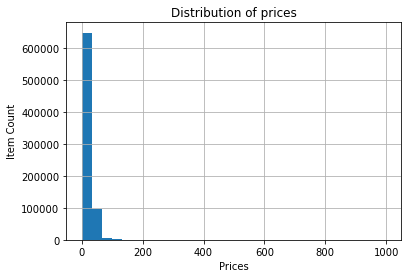

In [9]:
# Recommendation system may get skewed using price because of the non normal distribution.
df.price.hist(bins=30)
plt.xlabel('Prices')
plt.ylabel('Item Count')
plt.title('Distribution of prices')
plt.show()

In [10]:
# Very skewed. May need to narrow the price range in the future.
df.price[df['price'] < 100].describe()

count    750662.000000
mean         20.365498
std          12.618823
min           0.010000
25%          11.770000
50%          16.980000
75%          25.990000
max          99.990000
Name: price, dtype: float64

<AxesSubplot:>

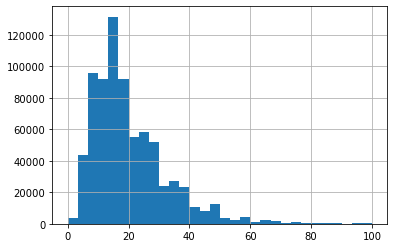

In [11]:
df.price[df['price'] < 100].hist(bins=30)

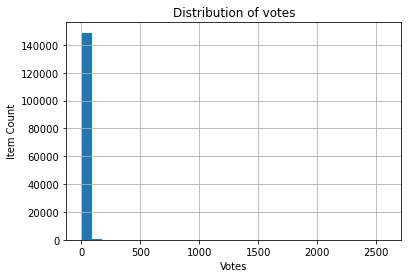

In [12]:
# vote has a wide standard deviation and is also highly skewed.
df.vote.hist(bins=30)
plt.xlabel('Votes')
plt.ylabel('Item Count')
plt.title('Distribution of votes')
plt.show()

<AxesSubplot:>

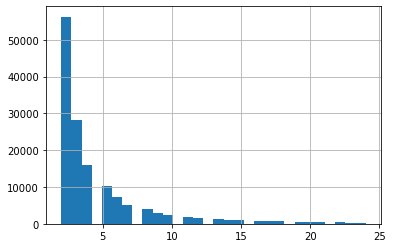

In [13]:
df.vote[df['vote'] < 25].hist(bins=30)

#### Boolean Data

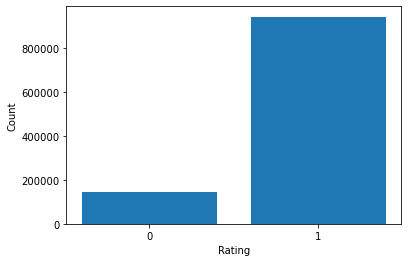

In [14]:
labels, counts = np.unique(df.verified, return_counts=True)
plt.bar(labels, counts, align='center')
plt.xticks([0, 1])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

#### Heat Map
None of the features are correlated.

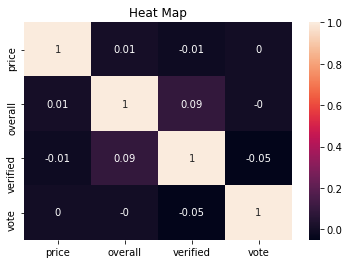

In [15]:
sns.heatmap(round(df.corr(), 2), annot=True)
plt.title('Heat Map')
plt.show()

#### Analyze Categories/Objects

In [16]:
df_objects = df.select_dtypes(include='object')
dfo_unique = pd.DataFrame(df_objects.nunique()).reset_index()
dfo_unique.columns = ['Features', 'Number of Categories']
dfo_unique.sort_values(by='Number of Categories', ascending=False)
dfo_unique

,Features,Number of Categories
0,category,1107
1,description,36532
2,title,40969
3,also_buy,29115
4,brand,8861
5,rank,36865
6,also_view,21871
7,main_cat,17
8,asin,41280
9,details,40178


Except for the main_cat, there are too many unique categories for several traditional types of exploratory data analysis to be helpful.
For example, one hot encoding using pd.get_dummies(df) runs into memory errors even when the biggest features are dropped from the analysis.
Therefore, in later notebooks will use options created specifically for recommendation systems. 

In [17]:
for col in df_objects.columns:
    counts = df[col].value_counts()
    print(f'Most common {col}:\n{counts.head(3)}\n')

Most common category:
['Grocery & Gourmet Food', 'Beverages', 'Coffee, Tea & Cocoa', 'Coffee', 'Single-Serve Capsules & Pods']    72518
['Grocery & Gourmet Food', 'Beverages', 'Coffee, Tea & Cocoa', 'Tea', 'Green']                              23105
['Grocery & Gourmet Food', 'Snack Foods', 'Bars', 'Nut Bars']                                               20554
Name: category, dtype: int64

Most common description:
['These bars are where our journey started and it was simple: whole ingredients like nuts, mixed with fruits and spices bound together with honey.', 'Allergen information: contains peanuts, tree nuts and dairy.<br>May contain nut shell fragments. . This product is labelled to United States standards and may differ from similar products sold elsewhere in its ingredients, labeling and allergen warnings', 'Mixed Nuts (Almonds, Peanuts, Walnuts), Chicory Root Fiber, Honey, Palm Kernel Oil, Sugar, Crisp Rice, Cocoa Powder, Non GMO Glucose, Sea Salt, Soy Lecithin, Milk Powder, Van

The most common details feature is empty.
Earlier, when cleaning the data there were checks for empty lists; however, not for empty dictionaries.
However, after further analysis the details feature is still useful because there are more than a million rows and only about 24k are empty.

#### Grouping by target

Grouping by 'overall' rating to show the average highest and lowest product ratings.

In [18]:
non_target_features = df.columns.drop('overall')
for feature in non_target_features:
    overall_grouping_avg = df.groupby(feature)[['overall']].mean()
    display(overall_grouping_avg.sort_values('overall', ascending=False))

,overall
category,
"['Grocery & Gourmet Food', 'Dairy, Cheese & Eggs', 'Eggs & Egg Substitutes', 'Egg Whites']",5.000000
"['Grocery & Gourmet Food', 'Produce', 'Fresh Vegetables', 'Tomatillos']",5.000000
"['Grocery & Gourmet Food', 'Cooking & Baking', 'Cooking Oils, Vinegars & Sprays', 'Oils', 'Safflower']",5.000000
"['Grocery & Gourmet Food', 'Cooking & Baking', 'Cooking Wine', 'White']",5.000000
"['Grocery & Gourmet Food', 'Herbs, Spices & Seasonings', 'Single Herbs & Spices', 'Ajowan']",5.000000
...,...
"['Grocery & Gourmet Food', 'Produce', 'Packaged Produce', 'Cut & Packaged Fruits', 'Mangoes']",3.043478
"['Grocery & Gourmet Food', 'Canned, Jarred & Packaged Foods', 'Packaged Meals & Side Dishes', 'Mexican Dishes', 'Burritos']",3.000000
"['Grocery & Gourmet Food', 'Olives, Pickles & Relishes', 'Olives', 'Greek']",2.800000


,overall
description,
"['Salt-Free Sunland Valencia Natural Peanut Butter is made with 100% pure roasted Valencia peanuts ground into a perfect creamy texture for spreading. While we all call them nuts, Valencia Peanuts, like all peanuts are legumes, more closely related to peas and beans--with one important difference: they grow beneath the ground. Valencia peanuts are a smaller, sweeter version with more intense flavor than other varieties of peanut. They have three to five kernels in each shell and are grown almost exclusively in eastern New Mexico. Valencia peanuts offer higher protein content than eggs and some meats, provide quick energy from carbohydrates, are high in fiber, and are a good source of monounsaturated and polyunsaturated fats, which have generally been shown to help reduce blood cholesterol levels. Valencia Natural Peanut Butter provides all the flavor and nutritional value these small but mighty, nuts--oops, legumes have to offer.Sunland, Inc. was formed in 1988 by a group of dedicated peanut farmers in Eastern New Mexico. Their mission has not changed since inception: to grow and market the naturally sweet and dense Valencia peanut unique to the area.', '100% Roasted Valencia Peanuts.', 'Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or health condition.']",5.0
"['Quaker Quisp Cereal is saucer-shaped, crunchy corn cereal has delighted kids and adults everywhere. Bring Quisp to your house and home planet today. The crispy flavor is out of this world. This is a healthy, delicious choice for everyone.', 'Corn Flour, Sugar, Oat Flour, Brown Sugar, Coconut Oil, Salt, Niacinamide (One of the B Vitamins), Reduced Iron, Zinc Oxide, Yellow 5, Yellow 6, Thiamin Mononitrate (One of the B Vitamins), Pyridoxine Hydrochloride (One of the B Vitamins), Bht (A Preservative), Riboflavin (One of the B Vitamins), Folic Acid (One of the B Vitamins).', 'Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or health condition.']",5.0
"['<b>About This BlackTie Box:</b> <br /> Introducing the BlackTie Box by Black Tie Mercantile, the first and only gift-ready packaging system designed for the unique challenges of E-Commerce. Whether you choose to ship directly to a recipient or to yourself, your item is guaranteed to arrive exactly as described and photographed. <br /> <br /> Founded in 1938 by Arne Dellgren and Bernt Bjurklint in Halland, Sweden, Hafi continues as a family owned and operated business into its fourth generation. Hafi brought together the community in a shared effortwith local growers providing fresh ingredients and Arnes mother, Frida, designing the beautiful labels. Although Hafi has grown considerably over the years, the company remains committed to the standards of quality and expertise that have always set it apart.<br /> <br /> Now get a BlackTie Box for any occasion featuring one 14.1 oz jar of Hafi Cloudberry Preserves.', 'Cloudberries, sugar, pectin, citric acid, potassium sorbate.', 'Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or health condition.']",5.0
"['Familiar to sushi enthusiasts from its use in miso soup, Wakame is also used in seaweed salads. Emerald Cove Wakame is ready-to-eat and can be tossed right out of the bag into miso soup!']",5.0
"[""Kraft's Red Wine Vinaigrette Salad Dressing is a tangy dressing with an explosion of red wine flavor. And in an easy-to-pour bottle, this delicious dressing adds tangy flavor to salads, sandwiches and pasta dishes.""]",5.0
...,...
"['Thai Kitchen Curry Paste, Green, 4-Ounce Jars (Pack of 12)', 'Green Chili, Garlic, Lemongrass, Galangal (Thai Ginger), Salt, Onion, Pepper, Coriander, Cumin, Kaffir Lime.', 'Statements regarding dietary supplements have not been evaluated

,overall
title,
Celestial Seasonings Herbal Tea Sampler Caffeine Free Herbal Tea - 18 CT,5.0
"Kraft Red Wine Vinaigrette Dressing and Marinade, 16-Ounce Bottles (Pack of 6)",5.0
"Amy's Light in Sodium Organic Chili, Medium, 14.7 Ounce (Pack of 6)",5.0
"DaVinci Penne Rigate, 16-ounces (Pack of12)",5.0
Mujeza Black Seed Honey- (Black cumin- nigella seeds) Not mixed with oil or powder Gluten Free Unfiltered Unprocessed 100% Natural Honey (Different Sizes Available) (600g),5.0
...,...
"Thai Kitchen Green Curry Paste, 4 Ounce (Pack of 12)",1.2
"Greenfire Custom Fortune Cookies, for Special Events and Occasions, Full Color Fortune Printing, Premium Vanilla, Bulk Quantity (300)",1.0
Factory Card and Party Outlet Passover Bag of Plagues,1.0


,overall
also_buy,
"['B000FOMKP4', 'B0015DSKFI', 'B001IZHRD4', 'B00DZQJMXC', 'B000ODV2PK', 'B007F0Y6MG', 'B01IEU0LOM', 'B002RGOHO0', 'B0773D9711', 'B00J7G9Z7C', 'B00032A9UQ', 'B00ILOUGL0']",5.000000
"['B01LAX4HLI', 'B00JSRG2TE', 'B019QR8MQQ', 'B01DQ1509A', 'B00LLW3QD4', 'B016NBKRBQ', 'B07889L749', 'B018LLKHAC', 'B00B8Z70AY', 'B00ZAD36ZS', 'B01NGWIE9Z', 'B015LOO8UC', 'B002863BIW', 'B00VXQGY1Y', 'B01BTNDHUQ', 'B01LL3FQQC', 'B06X3YHTFK', '132853104X', 'B07DDM5S5X', 'B071WY281Q', 'B078M46S8G', 'B0716P6ZZN', 'B00OJ757SK', 'B01ENL3Q02', 'B071XY8BDQ', 'B078XPFWL6', 'B072J8YZXK', 'B01FN6GQTO', 'B0146I3ND2', 'B00CLUWME4', 'B0764G6SNW', 'B01ENITUA0', 'B075DH9627', 'B004JWLQXA', 'B00VQO4YJC', 'B00FTB8K3Y', 'B075SLBPCW', 'B072126PMX', 'B00D0VI0A8', 'B01NAFXR8L', 'B07DY26Y4P', 'B071KKKG8F', 'B001NHEBA4', 'B07FNLGP92', 'B07DDZKHWM', 'B014VGMLCI', 'B06WWHG7TX', 'B00M08ZKNC', 'B00KRFLH5U', 'B00K4QF4HO', 'B00BSZBEAG', 'B01AYYF1NC', 'B01ENL3PXA', 'B01MYCSDB2', 'B001E5E3JY', 'B01GIUFON8', 'B0764NZF5L', 'B0046IIPMW', 'B000ENUC3S', 'B005J8DT0Q', 'B008QS89UG', 'B004AHDV5A', 'B00H0040PY', 'B0089VPTZ8', 'B01BODRE6Y', 'B06Y1JPZ4F', 'B01N20YNMT', '1328839230', 'B0089VPTW6', 'B01MREWFHO', '0525577238', 'B0013OZAZ2', 'B00QU781RG', 'B071YNVDCB', 'B00M8VSKW4', 'B00WNB40U0', 'B002LMC300', 'B0143NQW2E', 'B004T80BYE', 'B0078DRR44', 'B006MWDFUC', 'B01M19Z219', 'B00BU8SM60', 'B003PR0CFI', 'B07421LW7J', 'B004KUV136', 'B01MD0T6G0', 'B001AWWC1W', 'B075YDDT2Q', 'B00CMYMRL2', 'B007C6EE84', 'B019QR8MWK', 'B07954V5CL', 'B01LXXACU0', 'B00Y3NR648']",5.000000
"['B015YCMJPM', 'B00269UWFG', 'B00MW8L7BY', 'B077LZ2JQH', 'B00G6RK1NM', 'B003E3OTPC', 'B007WE9AVC', 'B002TY41QO', 'B002YOJER0', 'B0046GZM8O', 'B0182MQJ7A', 'B072WNVYZG', 'B002AWXELI', 'B00BQ3O2BS', 'B01FX12D3W', 'B000TYKI9K', 'B00ADX5WZ2', 'B0786YG7VM', 'B0017DGR1U', 'B01E76E5MQ', 'B00F2W4WZU', 'B00JZVWE0O', 'B000XBCBW6', 'B004YT5ZTY', 'B00JCU0QNA', 'B0044MNYIK', 'B077CLBP9C', 'B015VOTNLG', 'B06XKBWTVM', 'B008YLRX20', 'B01N4VHTH0', 'B075TW1ZXB', 'B01K300AUQ', 'B004OQLIHK', 'B014GCY8OG', 'B00BR47K2O', 'B00CF5D032', 'B079VTJD3S', 'B019HM9ZT8', 'B072N87D8W', 'B06XKNGBFP', 'B00I7FJ0OM', 'B07913JFQK', 'B074S4J2TJ', 'B009QQ8038', 'B00ISCT4PO', 'B00IOQKM5K', 'B013T80X4M', 'B004ATUND6', 'B006VYO276', 'B01E60QQ3Y', 'B00BP4UGYU', 'B000W7R7W0', 'B00FN6EC6Y', 'B00CFVDIKG', 'B004JUF3K4', 'B071KF6791', 'B071K69XHH', 'B004M15U12', 'B004W3ORA0', 'B01965DYYS', 'B078947VCS', 'B0014H6SB8', 'B019DM86LA', 'B0081A2SLK', 'B01965DY48', 'B013DSZFIW', 'B006J0WNX2', 'B001XSMANI', 'B00XERL95Q', 'B01LZ46MT7', 'B008LTRIYI', 'B00CCQWK6C', 'B0725YS2TK']",5.000000
"['B01KQLV21S', 'B06XKQFP5W', 'B00PO9NHES', 'B000PGQQFC', 'B01N019I01', 'B0065JA1IQ', 'B00CF02AME', 'B000OQWAS0', 'B000NKWGJK', 'B000NNEESI', 'B003VIDMNU', 'B00JPY020A', 'B00D60877Y', 'B004H4QZ2M', 'B000NNCMG4', 'B00745DOK2', 'B006LPQ82M', 'B0065JENSU', 'B000R32F6M', 'B00796KNHS', 'B01958H62M', 'B0001TNPA2', 'B00WSXLT84']",5.000000
"['B00BBL6QDW', 'B001L048WO', 'B00BBL6U10', 'B07BFKV1VK', 'B078G9ZDNR', 'B00IMTPTA2', 'B007G92C6I', 'B007FRASYO', 'B07B3Q6442', 'B00BBL6SWQ', 'B00JGAG6IK', 'B071RR7G8R', 'B07C56L5T4', 'B073WJLXH8', 'B00JGAGZ0Y', 'B007FRCIVA', 'B004YCTVIW', 'B06XPQ5WG6', 'B0049W7CBA', 'B07BC4VMSL', 'B075TS736D', 'B0118E0FD8', 'B079QN1T5J', 'B00KVVDB72', 'B07GFDGB9V', 'B00KVVDE2O', 'B06ZZGNRHT', 'B007FRDHCY', 'B01N10JHM6', 'B00BBL75L4', 'B076H7J3DY', 'B071DR41BY', 'B01MFFGAXM', 'B06XZBMGYR', 'B071922SN6', 'B07B7CL9G8', 'B01ECMU07Y', 'B07979LS83', 'B007FRDBUM', 'B06XZCMRHD', 'B06XZTSCX4', 'B06XZW1DSS', 'B078WKN32X', 'B06XZD7YG5', 'B07GSDSZGS', 'B079555RK3', 'B01AAYWE22', 'B007FRAAB0', 'B00GMRDKV6', 'B071GWSBMM', 'B007FRDB1Q', 'B008DVSATQ', 'B0797FXM6G', 'B003LNOPSG', 'B07B88PL8N', 'B01BQR2LFM', 'B014HXBLVW', 'B07DHBNGF7', 'B079DGKJJQ', 'B00DJ6IF90', 'B00F8GSGT8', 'B06XZ9YBTB', 'B00CPBS2E8', 'B01IAH86RI', 'B0714QNND3', 'B01HTTEC0S', 'B00AH6HYQ0', 'B076H6FSHR', 'B015FYRBXO', 'B00WFL8RD4', 'B06XSW1SZ9', 'B019AGPQ4E', 'B06XZS492V', 'B00T00QMHG', 'B00ECOVS3S', 'B00OHNBOBU', 'B00ECOV74I

,overall
brand,
Kargher,5.000000
Mrs Millers Homemade,5.000000
Sonny's,5.000000
Burt's Bees,5.000000
Sonny & Joe's,5.000000
...,...
Tolerant Foods,1.714286
WaffleWaffle,1.714286
Drink Chia,1.500000


,overall
rank,
"46,598 in Grocery & Gourmet Food (",5.0
"73,258 in Grocery & Gourmet Food (",5.0
"469,903 in Grocery & Gourmet Food (",5.0
"129,023 in Grocery & Gourmet Food (",5.0
"73,651 in Grocery & Gourmet Food (",5.0
...,...
"453,831 in Grocery & Gourmet Food (",1.2
"384,445 in Health & Household (",1.0
"384,006 in Grocery & Gourmet Food (",1.0


,overall
also_view,
"['B002RBTV78', 'B009ZJHQVS', 'B004XDMS3C', 'B00D9RRZ3Q', 'B07BDPDMW3', 'B00QIRM3CW', 'B00PNGAJCK', 'B07BQLJH5T', 'B01M4MO1BA', 'B00N24CM98', 'B00AWAYLYO', 'B004AQZNAW', 'B015OBXFMO', 'B00FAVU914', 'B007H8EJMI', 'B00AEAQJNS', 'B007R6FR2Q', 'B019NVNABM', 'B00I0C3WKK', 'B00SXRE6NO', 'B00GJ7WQBO', 'B071SFKSK8', 'B010NBQ9UK', 'B009ZJHOAG', 'B002RBTYRK', 'B002ULEFYE', 'B00405AXEO', 'B00DXLBBQU', 'B0042TVKZY', 'B00FKDFRTQ', 'B01N5Q2QEK', 'B0756LK7Z5', 'B00U3WWXA0', 'B000IXUK8G', 'B004L4EJQ2', 'B01965DYYS', 'B01AHPBP88']",5.0
"['B00KHXESLC', 'B00PFDH0IC', 'B00DDT116M', 'B074TQ24SY', 'B014LT0712', 'B010QN2AKS', 'B06Y2KV2J1', 'B01G0S3Y44', 'B00V9FJZMY', 'B01CUW7HPG', 'B07DJ1KVDP', 'B01NAH3I71', 'B01LOQ9842', 'B013GMM3US', 'B06ZY998XB', 'B071989165', 'B06XXQF4DB', 'B00NYYVWFQ', 'B076CWTSB1', 'B017U3F1U8', 'B011DMQRXW', 'B07DM7P5PG', 'B00KQXD936', 'B07C72ZDTT', 'B01DTQD7VA', 'B0101A2FFQ', 'B017QYXVSK', 'B00WVNY0CI', 'B00Y8BUC6E', 'B018NHO87C', 'B000WB1YSE', 'B01FE95IDU', 'B01L2GW7SI', 'B015NBLJY6', 'B07BVDL7ZC', 'B013IL2JX8', 'B01C3MT4IQ', 'B014DSIT5C', 'B001B2SVOS', 'B06ZZY859Z', 'B009PARMMA', 'B0019FOZC4', 'B00O41OKEI', 'B00J7QWB14', 'B075RB264F', 'B00UG4ST1W', 'B00447S4YY', 'B00X6BX6ZG', 'B003VSEG7Q', 'B01F9CNJ42', 'B01C6F1SQ6', 'B013XKP3TG', 'B01BY9RTNQ', 'B000SATIFA']",5.0
"['B0728JG21W', 'B000HQMNIO', 'B01MY0J2L9', 'B0002HAAQ0', 'B01NAHBW9H']",5.0
"['B0017L0FME', 'B00AZWV1LK', 'B0017KYJK4', 'B004E2OJFM', 'B003MZBIG0']",5.0
"['B0017L8JZE', 'B000WLHXOS', 'B07GD98K52', 'B000FBKFRW', 'B000FBQ4YU', 'B077K8CPXW', 'B00MTV3QW2', 'B0121ISUPA', 'B00886H9DE', 'B000FBKFV8', 'B077TG9RXQ', 'B005Z4B550', 'B01836WSUW', 'B00MTV2AG0', 'B017Y22WSO', 'B005Z43DVY', 'B001SAQKIW', 'B008SP4VT0', 'B000FBO9LK', 'B016ZIOC9U', 'B007CXUTHM', 'B00RZTAO6Y', 'B000FBQ50I', 'B00060P2M0', 'B0019FM36Y', 'B00C50TCSE', 'B000F9X40O', 'B01D6D1VQ4', 'B01M3X9L1P', 'B00P9YBM4A', 'B01LZ3OPTK', 'B003FJ4AN6', 'B00G18VTQY', 'B000LZYV40', 'B003VC3M90', 'B00I8VS45G', 'B00TP7HRD2', 'B000FBM3WC', 'B0061BPM2S', 'B01FUQELY4', 'B004JXGY5O', 'B004LDCZGE', 'B01M65KZYJ', 'B01MDV7MLB', 'B000MUT900', 'B076KXQ4VP', 'B003D5JJEC', 'B0759RZSJY', 'B01D6ELPPU', 'B00ICLGATE', 'B00NU8F1WQ']",5.0
...,...
"['B000LKVSDM', 'B003VYH8AM']",1.2
"['B01M22URBN', 'B00DT39IH6']",1.0
"['B007QVJ8PE', 'B0015844LM']",1.0


,overall
main_cat,
Cell Phones & Accessories,4.800000
Musical Instruments,4.625000
Industrial & Scientific,4.557296
Home Audio & Theater,4.545455
Sports & Outdoors,4.483806
Toys & Games,4.476804
Office Products,4.457933
Camera & Photo,4.444444
Grocery,4.440004


,overall
price,
17.41,5.000000
82.54,5.000000
70.44,5.000000
70.28,5.000000
40.60,5.000000
...,...
82.49,2.250000
24.34,2.200000
7.11,2.174757


,overall
asin,
B003QAHH5W,5.0
B001EQ58EC,5.0
B00MQ50AGG,5.0
B001EQ56Y4,5.0
B0096Q39J8,5.0
...,...
B000LKXQRS,1.2
B0014AJV82,1.0
B000WW6VZO,1.0


,overall
details,
"{'Shipping Weight:': '6.4 pounds', 'ASIN: ': 'B007A4JB7C', 'UPC:': '030300015268'}",5.0
"{'Shipping Weight:': '6.6 pounds (', 'ASIN: ': 'B00U6MCGD6', 'UPC:': '737069889771'}",5.0
"{'Shipping Weight:': '6.6 pounds (', 'Domestic Shipping: ': 'Currently, item can be shipped only within the U.S. and to APO/FPO addresses. For APO/FPO shipments, please check with the manufacturer regarding warranty and support issues.', 'International Shipping: ': 'This item is not eligible for international shipping.', 'ASIN: ': 'B000ET93MS', 'UPC:': '707005290923', 'Item model number:': '10085693101002'}",5.0
"{'Shipping Weight:': '6.6 pounds (', 'Domestic Shipping: ': 'Currently, item can be shipped only within the U.S. and to APO/FPO addresses. For APO/FPO shipments, please check with the manufacturer regarding warranty and support issues.', 'International Shipping: ': 'This item is not eligible for international shipping.', 'ASIN: ': 'B000PDMB0Y'}",5.0
"{'Shipping Weight:': '6.6 pounds (', 'Domestic Shipping: ': 'Currently, item can be shipped only within the U.S. and to APO/FPO addresses. For APO/FPO shipments, please check with the manufacturer regarding warranty and support issues.', 'International Shipping: ': 'This item is not eligible for international shipping.', 'ASIN: ': 'B003SKYAQE', 'UPC:': '839456001091'}",5.0
...,...
"{'Shipping Weight:': '2 pounds', 'Domestic Shipping: ': 'Currently, item can be shipped only within the U.S. and to APO/FPO addresses. For APO/FPO shipments, please check with the manufacturer regarding warranty and support issues.', 'International Shipping: ': 'This item is not eligible for international shipping.', 'ASIN: ': 'B004TJF39G', 'Item model number:': '35926804651'}",1.2
"{'\n Item Weight: \n ': '15 pounds', 'Shipping Weight:': '15 pounds (', 'ASIN: ': 'B000WW6VZO', 'UPC:': '899041002261', 'Item model number:': 'FORTUNE100'}",1.0
"{'Shipping Weight:': '8.8 pounds', 'Domestic Shipping: ': 'Currently, item can be shipped only within the U.S. and to APO/FPO addresses. For APO/FPO shipments, please check with the manufacturer regarding warranty and support issues.', 'International Shipping: ': 'This item is not eligible for international shipping.', 'ASIN: ': 'B000ZB3CRC', 'UPC:': '011300380709', 'Item model number:': '38070'}",1.0


,overall
verified,
True,4.478053
False,4.187316


,overall
reviewerID,
A1U7P0J1HDFAWM,5.0
A1S4VHER8YQMPH,5.0
AC34TPWTVKUJB,5.0
A3CUQL4QH0B2A6,5.0
A2CT5A2222BR6B,5.0
...,...
A2P6IDL5251A3B,1.0
AROXQ9TFQ7G2,1.0
A18BI4ZBFUVE2O,1.0


,overall
reviewText,
\n\n\n\n\n\nI,5.0
Really mouthwatering,5.0
"Really love this product for trips--we do something similar with Starbucks Vias for coffee and they work out great! All you need is hot water and it works out very well, even better in some cases than tea bags when you can't get the water hot enough to properly steep. Very versatile and tastes great! Would also be great for an office as long as you have access to a microwave.",5.0
Really love this product!!!! Very comforting.,5.0
"Really love this product, I will definitely buy this again.",5.0
...,...
"Every can was so dented as to be unusable. I'm sure the peas are fine, but I will never know because I am throwing every can away. Almost 20 dollars in the trash. I'm not able to mail this back, I can't lift it and was counting on the postman's strong back to do the heavy lifting for me.\nIt looks to me like on closer inspection that the flimsy cardboard and plastic wrapping for the 12 cans allow some to scoot up higher, and then the can under the rim gets dented by the neighboring can's rim. These cans were so smashed that I'm sure the food is unsafe.\nThe exterior box was almost destroyed from rough handling.\nThe mailing method needs changing.",1.0
"I purchased 2 of these because normally I really like Praline syrups but this one doesn't taste anything like praline, it is all chestnut flavor and not a good chestnut flavor either. There is no nuttiness to this flavor at all, it is hard to describe but it kind of has a smokey burnt sugar flavor. Our family has only managed to drink about 1/4 of only 1 of the bottles I purchased. I hate to have to throw a brand new bottle out but it is very hard to get it down even if you mix it with another flavor to soften the smokey burnt flavor. Sorry but this one I can't recommend.",1.0
"Every cherry in the box was melted and busted open and leaked all the goo all over in the box, it was a sticky mess! We had to throw a lot away. Very disappointed as I have ordered these before and they were perfect, I got a full refund from amazon no questions asked. Not sure I would take a chance again.",1.0


,overall
summary,
,5.0
Order every other month,5.0
Order came quickly. I purchased this product to use ...,5.0
Order before you run out,5.0
Order at your own risk,5.0
...,...
Expired chocolate FTW,1.0
Expired by over a year,1.0
Not Brazilian coconut water anymore- now is low qual stuff!,1.0


,overall
vote,
170.0,5.0
118.0,5.0
213.0,5.0
214.0,5.0
218.0,5.0
...,...
221.0,1.0
223.0,1.0
293.0,1.0


,overall
style,
"{'Size:': ' 10 Lb', 'Flavor:': ' Green Unroasted Ethiopia Coffee Beans'}",5.0
"{'Size:': ' 10.5 Ounce (Pack of 6)', 'Flavor:': ' Blackberry'}",5.0
"{'Size:': ' 61 Ounce Box', 'Style:': ' Fruit'}",5.0
"{'Size:': ' 10.5 Ounce (Pack of 12)', 'Flavor:': ' Chocolate Peanut Butter'}",5.0
"{'Size:': ' 10.5 Ounce (Pack of 12)', 'Flavor:': ' Healthy Request. Vegetable'}",5.0
...,...
{'Style:': ' Fat Free Apple Cinnamon'},1.0
"{'Size:': ' 24 Ounce', 'Flavor:': ' Mixed Nuts with Peanuts'}",1.0
{'Flavor:': ' 3 Pack - Culinary (Organic)'},1.0


The above also shows that most of the features have at least some distribution of the product's rating. 
The main exception is the verified boolean.

Usually, would add default values for nulls in several of the columns either here, or earlier in the process.
However, for the recommendation systems it is expected that a significant amount of the data could be null.
Therefore, leaving this as is for now.

## Save Data

In [19]:
df.to_csv('../Data/eda_data.csv', index=False)

## Summary
- There are only 3 numeric (overall, price, and vote) and 1 boolean (verified) features in the data set.
- All of these are skewed toward one value or range of values.
    - Overall ratings are heavily skewed towards 5.
    - Both lower values for price and votes are most frequent.
    - Majority of reviews are verified.
- The majority of the features are categories/objects/text.
- Also, most of the features have at least some distribution of the product's rating. The main exception is the verified boolean. 
- There are so many categories it wasn't possible to do one hot encoding because of memory issues.
- However, this didn't matter because will use processes designed specifically for recommendation systems to overcome these limitations.